In [3]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
pregnancy_dataset = pd.read_csv('/content/bootcamp.csv') 
pregnancy_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [5]:
pregnancy_dataset.shape

(1014, 7)

In [6]:
pregnancy_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.268245
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.443264
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,0.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,1.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,1.000000


In [7]:
pregnancy_dataset['RiskLevel'].value_counts()

0    742
1    272
Name: RiskLevel, dtype: int64

In [8]:
pregnancy_dataset.groupby('RiskLevel').mean()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
0,27.545822,109.167116,73.303235,7.480863,98.579245,73.407008
1,36.216912,124.194853,85.073529,12.122610,98.899265,76.742647


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


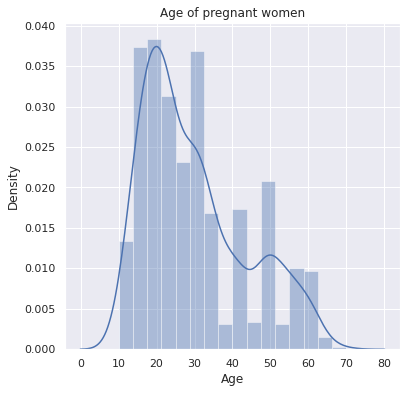

In [9]:
#Plot the models on a graph
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(pregnancy_dataset['Age'])
plt.title('Age of pregnant women')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


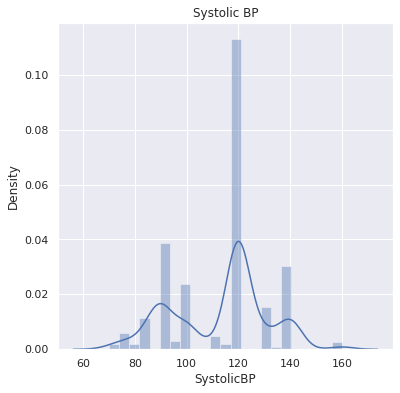

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(pregnancy_dataset['SystolicBP'])
plt.title('Systolic BP')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


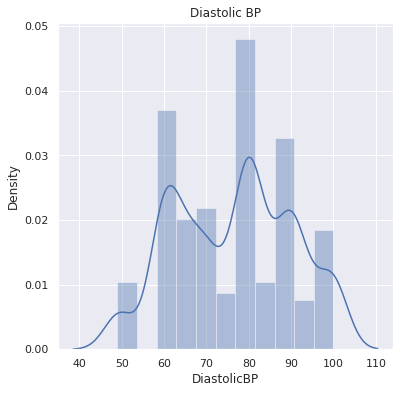

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(pregnancy_dataset['DiastolicBP'])
plt.title('Diastolic BP')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


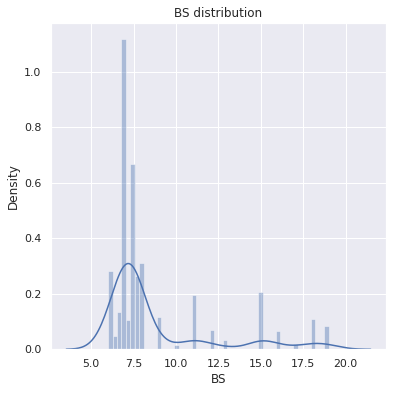

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(pregnancy_dataset['BS'])
plt.title('BS distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


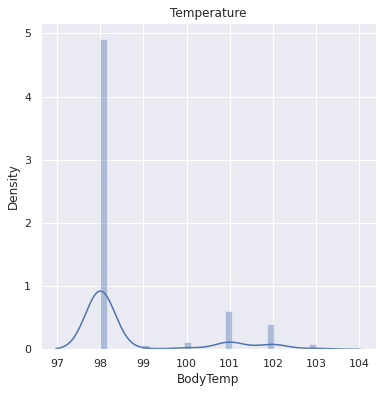

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(pregnancy_dataset['BodyTemp'])
plt.title('Temperature')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


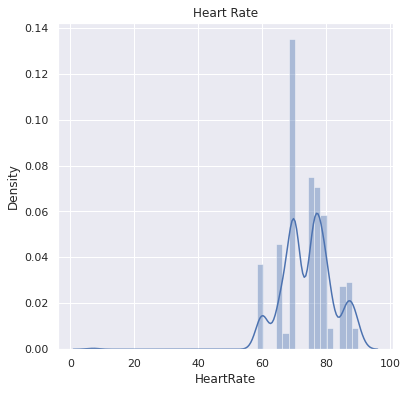

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(pregnancy_dataset['HeartRate'])
plt.title('Heart Rate')
plt.show()

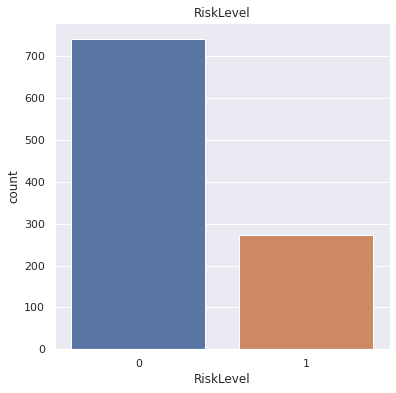

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='RiskLevel', data=pregnancy_dataset)
plt.title('RiskLevel')
plt.show()

In [16]:
#Splitting our Data into Testing and Training Data
X = pregnancy_dataset.drop(columns = 'RiskLevel', axis=1)
Y = pregnancy_dataset['RiskLevel']
print(X)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [17]:
print(Y)

0       1
1       1
2       1
3       1
4       0
       ..
1009    1
1010    1
1011    1
1012    1
1013    0
Name: RiskLevel, Length: 1014, dtype: int64


In [18]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.36173812  0.91339632  0.25502279  1.90589019 -0.4852155   1.44695615]
 [ 0.38077697  1.45702716  0.97553854  1.29833966 -0.4852155  -0.53208757]
 [-0.06473208 -1.26112705 -0.46549297 -0.22053665  0.97388449  0.70481475]
 ...
 [ 0.38077697 -1.53294248 -1.18600873  3.12099124 -0.4852155   1.44695615]
 [ 0.97478904  0.36976548  0.97553854  2.81721597 -0.4852155  -0.53208757]
 [ 0.15802244  0.36976548 -0.82575085 -0.82808717  1.70343448  0.21005383]]


In [20]:
X = standardized_data
Y = pregnancy_dataset['RiskLevel']
print(X)
print(Y)

[[-0.36173812  0.91339632  0.25502279  1.90589019 -0.4852155   1.44695615]
 [ 0.38077697  1.45702716  0.97553854  1.29833966 -0.4852155  -0.53208757]
 [-0.06473208 -1.26112705 -0.46549297 -0.22053665  0.97388449  0.70481475]
 ...
 [ 0.38077697 -1.53294248 -1.18600873  3.12099124 -0.4852155   1.44695615]
 [ 0.97478904  0.36976548  0.97553854  2.81721597 -0.4852155  -0.53208757]
 [ 0.15802244  0.36976548 -0.82575085 -0.82808717  1.70343448  0.21005383]]
0       1
1       1
2       1
3       1
4       0
       ..
1009    1
1010    1
1011    1
1012    1
1013    0
Name: RiskLevel, Length: 1014, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1014, 6) (811, 6) (203, 6)


In [22]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [23]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8606658446362515


In [24]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8374384236453202


In [25]:
# Input module
input_data = (35,140,90,13,98,70)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The pregnant patient is at low risk')
else:
  print('The pregnant patient is at high risk')

[[ 0.38077697  1.45702716  0.97553854  1.29833966 -0.4852155  -0.53208757]]
[1]
The pregnant patient is at high risk


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
